# Linear regression

Import all the modules you will need in this notebook here:

In [1]:
# exercise 0
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import abline_plot


We continue analysing the `fram` heart disease data.

First load the data, use the name `fram` for the DataFrame variable. Make sure that in the data you loaded the column and row headers are in place. Checkout the summary of the variables using the `describe` method.

In [2]:
# exercise 1
def get_path(filename):
    import sys
    import os
    prog_name = sys.argv[0]
    if os.path.basename(prog_name) == "__main__.py":   # Running under TMC
        return os.path.join(os.path.dirname(prog_name), "..", "src", filename)
    else:
        return filename
    
fram = pd.read_csv(get_path("fram.txt"), sep='\t')
fram.describe()

,ID,AGE,FRW,SBP,SBP10,DBP,CHOL,CIG,CHD,DEATH,YRS_DTH
count,1394.000000,1394.000000,1394.000000,1394.000000,767.000000,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000
mean,4737.184362,52.431133,105.365136,148.086083,148.040417,90.135581,234.644907,8.029412,1.187948,1.700861,16.219512
std,1073.406896,4.781507,17.752489,28.022062,25.706664,14.226235,46.303822,11.584138,2.615976,3.203132,3.921413
min,1070.000000,45.000000,52.000000,90.000000,94.000000,50.000000,96.000000,0.000000,0.000000,0.000000,1.000000
25%,3890.250000,48.000000,94.000000,130.000000,130.000000,80.000000,200.000000,0.000000,0.000000,0.000000,18.000000
50%,4821.000000,52.000000,103.000000,142.000000,145.000000,90.000000,230.000000,0.000000,0.000000,0.000000,18.000000
75%,5641.750000,56.000000,114.000000,160.000000,160.000000,98.000000,264.000000,20.000000,0.000000,0.000000,18.000000
max,6442.000000,62.000000,222.000000,300.000000,264.000000,160.000000,430.000000,60.000000,10.000000,10.000000,18.000000


Create function `rescale` that takes a Series as parameter. It should center the data and normalize it by dividing
by 2$\sigma$, where $\sigma$ is the standard deviation. Return the rescaled Series.

In [3]:
# exercise 2
def rescale(s:pd.Series) -> pd.Series:
    mean = s.mean()
    std = s.std()
    return (s - mean) / (2 * std)

Add to the DataFrame the scaled versions of all the continuous variables (with function `rescale`). Add small letter `s` in front of the original variable name to get the name of the scaled variable. For instance, `AGE` -> `sAGE`.

In [4]:
# exercise 3
fram["sAGE"] = rescale(fram["AGE"])
fram["sFRW"] = rescale(fram["FRW"])
fram["sSBP"] = rescale(fram["SBP"])
fram["sDBP"] = rescale(fram["DBP"])
fram["sCHOL"] = rescale(fram["CHOL"])
fram["sCIG"] = rescale(fram["CIG"])
fram["sCHD"] = rescale(fram["CHD"])
fram["sDEATH"] = rescale(fram["DEATH"])
fram["sYRS_DTH"] = rescale(fram["YRS_DTH"])

Form a model that predicts systolic blood pressure using weight, gender, and cholesterol level as explanatory variables. Store the fitted model in variable named `fit`.

                            OLS Regression Results                            
Dep. Variable:                    SBP   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     66.37
Date:                Thu, 18 Aug 2022   Prob (F-statistic):           4.13e-40
Time:                        20:02:42   Log-Likelihood:                -6530.4
No. Observations:                1394   AIC:                         1.307e+04
Df Residuals:                    1390   BIC:                         1.309e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     150.0199      0.985    152.336      

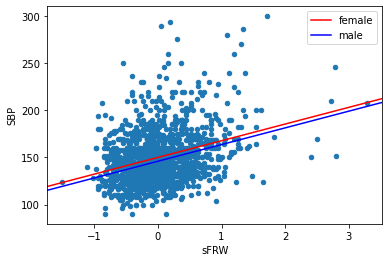

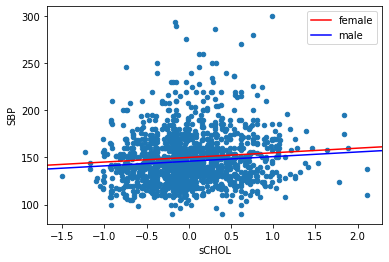

In [5]:
# exercise 4
fit = smf.ols("SBP ~ sFRW + SEX + sCHOL", data=fram).fit()

# Display model's summary.
print(fit.summary())

# The gender parameter is a binary (0 or 1). 
# Thus we can use it as an additon to the intercept.
intercept_male = fit.params.Intercept + fit.params["SEX[T.male]"]
intercept_female = fit.params.Intercept

# Plot influence of weight to systolic blood presure.
ax_frw = fram.plot.scatter("sFRW", "SBP")
slope_frw=fit.params["sFRW"]
abline_plot(intercept=intercept_female, slope=slope_frw, ax=ax_frw, color="red", label="female")
abline_plot(intercept=intercept_male, slope=slope_frw, ax=ax_frw, color="blue", label="male")
ax_frw.legend()

# Plot influence of cholesterol level to systolic blood presure.
ax_chol = fram.plot.scatter("sCHOL", "SBP")
slope_chol=fit.params["sCHOL"]
abline_plot(intercept=intercept_female, slope=slope_chol, ax=ax_chol, color="red", label="female")
abline_plot(intercept=intercept_male, slope=slope_chol, ax=ax_chol, color="blue", label="male")
ax_chol.legend()


Add the variable AGE to the model and inspect the estimates of the coefficients using the `summary` method of the fitted model. Again use the name `fit` for the fitted model. (From now on assume that we always use the name `fit` for the variable of the fitted model.)

                            OLS Regression Results                            
Dep. Variable:                    SBP   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     59.39
Date:                Thu, 18 Aug 2022   Prob (F-statistic):           2.44e-46
Time:                        20:02:43   Log-Likelihood:                -6513.6
No. Observations:                1394   AIC:                         1.304e+04
Df Residuals:                    1389   BIC:                         1.306e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     150.1695      0.974    154.221      

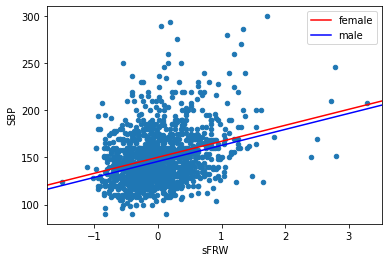

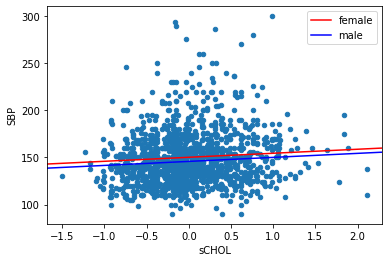

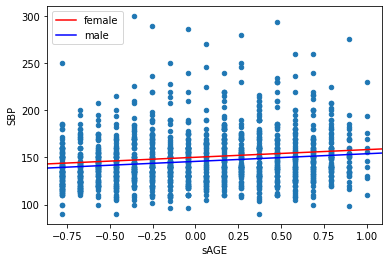

In [6]:
# exercise 5
fit = smf.ols("SBP ~ sFRW + SEX + sCHOL + sAGE", data=fram).fit()
print(fit.summary())

# The gender parameter is a binary (0 or 1). 
# Thus we can use it as an additon to the intercept.
intercept_male = fit.params.Intercept + fit.params["SEX[T.male]"]
intercept_female = fit.params.Intercept

# Plot influence of weight to systolic blood presure.
ax_frw = fram.plot.scatter("sFRW", "SBP")
slope_frw=fit.params["sFRW"]
abline_plot(intercept=intercept_female, slope=slope_frw, ax=ax_frw, color="red", label="female")
abline_plot(intercept=intercept_male, slope=slope_frw, ax=ax_frw, color="blue", label="male")
ax_frw.legend()

# Plot influence of cholesterol level to systolic blood presure.
ax_chol = fram.plot.scatter("sCHOL", "SBP")
slope_chol=fit.params["sCHOL"]
abline_plot(intercept=intercept_female, slope=slope_chol, ax=ax_chol, color="red", label="female")
abline_plot(intercept=intercept_male, slope=slope_chol, ax=ax_chol, color="blue", label="male")
ax_chol.legend()

# Plot influence of age to systolic blood presure.
ax_age = fram.plot.scatter("sAGE", "SBP")
slope_age=fit.params["sAGE"]
abline_plot(intercept=intercept_female, slope=slope_age, ax=ax_age, color="red", label="female")
abline_plot(intercept=intercept_male, slope=slope_age, ax=ax_age, color="blue", label="male")
ax_age.legend()

How much does the inclusion of age increase the explanatory power of the model? Which variables explain the variance of the target variable most?

***

Inclusion of age increases the explanatory power of the model.
This conclusion is based on the comparison of R-squared values between old and new models.
R-squared is the measurement of how much of the independent variable is explained by changes in the dependent variables.
Model without age explains 12.5% of the change in `SBP` variable.
Model with age explains 14.6% of the change in `SBP` variable.
Altogether we can conclude that inclusion of age increases the explanatory power of the model by 16.8%.

Most of all the variance of the target variable `SBP` (Systolic Blood Pressure) is explained by the `sFRF` (Weight in relation to groups median; normalized) independent variable, because it has the highest coefficient value of 16.9.

Next in descending order:
- `sAGE` (Age at the start of the study; normalized) with coefficient value of 8.1
- `SEX` (Gender) with coefficient value of -4.3
- `sCHOL` (Cholesterol level; normalized) with coefficient value of 4.2

***

Try to add to the model all the interactions with other variables. 

In [7]:
# exercise 6
fit = smf.ols("SBP ~ SEX + sAGE + sFRW + sCHOL + sFRW:SEX + sFRW:sAGE + sFRW:sCHOL + sCHOL:SEX + sCHOL:sAGE + SEX:sAGE", data=fram).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    SBP   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     24.52
Date:                Thu, 18 Aug 2022   Prob (F-statistic):           4.92e-43
Time:                        20:02:44   Log-Likelihood:                -6509.9
No. Observations:                1394   AIC:                         1.304e+04
Df Residuals:                    1383   BIC:                         1.310e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           150.5439      1.00

Then visualize the model as the function of weight for the youngest (sAGE=-1.0), middle aged (sAGE=0.0), and oldest (sAGE=1.0) women while assuming the background variables to be centered. Remember to consider the changes in the intercept and in the regression coefficient caused by age. Visualize both the data points and the fitted lines.

Intercepts: 140.32500291911813, 150.54385413474523, 160.76270535037233
Slopes: 18.731547684630694, 16.644973409697915, 14.558399134765136


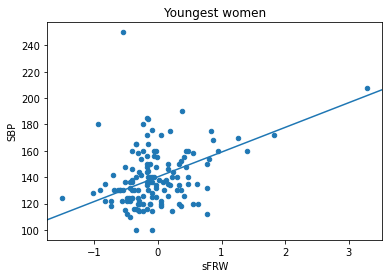

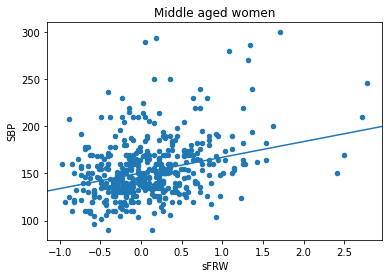

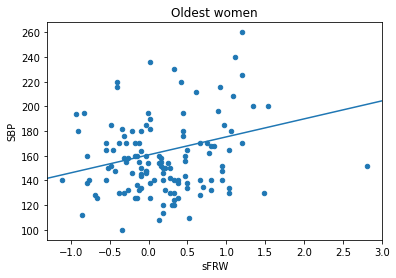

In [8]:
# exercise 7

# Prepare data for each age group of women.
fram_women = fram[fram["SEX"] == "female"]
fram_youngest_women = fram_women[fram_women["sAGE"] <= -0.5]
fram_middleaged_women = fram_women[(fram_women["sAGE"] > -0.5) & (fram_women["sAGE"] < 0.5)]
fram_oldest_women = fram_women[fram_women["sAGE"] >= 0.5]

p = fit.params

# Plot dependency of blood presure on weight for each age group of women.
ax_youngest_women = fram_youngest_women.plot.scatter("sFRW", "SBP")
ax_middleaged_women = fram_middleaged_women.plot.scatter("sFRW", "SBP")
ax_oldest_women = fram_oldest_women.plot.scatter("sFRW", "SBP")
#
ax_youngest_women.set_title("Youngest women")
ax_middleaged_women.set_title("Middle aged women")
ax_oldest_women.set_title("Oldest women")

# Plot regression for youngest women.
intercept_youngest_women = p.Intercept - p["sAGE"]
slope_youngest_women  = p["sFRW"] - p["sFRW:sAGE"]
abline_plot(intercept=intercept_youngest_women, slope=slope_youngest_women, ax=ax_youngest_women)

# Plot regression for midle aged women.
intercept_middleaged_women = p.Intercept
slope_middleaged_women  = p["sFRW"]
abline_plot(intercept=intercept_middleaged_women, slope=slope_middleaged_women, ax=ax_middleaged_women)

# Plot regression for oldest women.
intercept_oldest_women = p.Intercept + p["sAGE"]
slope_oldest_women  = p["sFRW"] + p["sFRW:sAGE"]
abline_plot(intercept=intercept_oldest_women, slope=slope_oldest_women, ax=ax_oldest_women)


print(f"Intercepts: {intercept_youngest_women}, {intercept_middleaged_women}, {intercept_oldest_women}")
print(f"Slopes: {slope_youngest_women}, {slope_middleaged_women}, {slope_oldest_women}")


How does the dependence of blood pressure on weight change as a person gets older?
***

The dependence of blood pressure on weight change DECREASES as a person gets older: slope coefficients are decreased from 18.7 for youngest to 16.6 for middle aged and to 14.5 for oldest women.
However in average the blood pressure INCREASES as a person gets older: intercept coefficients are increased from 140.3 for youngest to 150.5 for middle aged and to 160.7 for oldest women.
***

### Even more accurate model

Include the background variable `sCIG` from the data and its interactions. Visualize the model for systolic blood pressure as the function of the most important explanatory variable. Visualize separate lines for the small (-1.0), average (0.0), and large (1.0) values of `sCHOL`. Other variables can be assumed to be at their mean value.

                            OLS Regression Results                            
Dep. Variable:                    SBP   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     16.50
Date:                Thu, 18 Aug 2022   Prob (F-statistic):           2.99e-40
Time:                        20:02:44   Log-Likelihood:                -6508.6
No. Observations:                1394   AIC:                         1.305e+04
Df Residuals:                    1378   BIC:                         1.313e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           151.3182      1.16

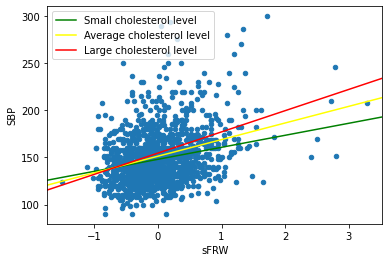

In [9]:
# exercise 8
fit = smf.ols("SBP ~ SEX + sAGE + sFRW + sCHOL + sCIG + sFRW:SEX + sFRW:sAGE + sFRW:sCHOL + sFRW:sCIG + sCHOL:SEX + sCHOL:sAGE + sCHOL:sCIG + sCIG:SEX + sCIG:sAGE + SEX:sAGE", data=fram).fit()
print(fit.summary())


p = fit.params

# Plot dependency of blood presure on weight.
ax = fram.plot.scatter("sFRW", "SBP")

# Plot regression for small cholesterol level.
intercept_small_chol = p.Intercept - p["sCHOL"]
slope_small_chol  = p["sFRW"] - p["sFRW:sCHOL"]
abline_plot(intercept=intercept_small_chol, slope=slope_small_chol, ax=ax, color = "green", label = "Small cholesterol level")

# Plot regression for small average level.
intercept_avg_chol = p.Intercept
slope_avg_chol  = p["sFRW"]
abline_plot(intercept=intercept_avg_chol, slope=slope_avg_chol, ax=ax, color = "yellow", label = "Average cholesterol level")

# Plot regression for large average level.
intercept_large_chol = p.Intercept + p["sCHOL"]
slope_large_chol  = p["sFRW"] + p["sFRW:sCHOL"]
abline_plot(intercept=intercept_large_chol, slope=slope_large_chol, ax=ax, color = "red", label = "Large cholesterol level")

ax.legend()

print(f"Intercepts: {intercept_small_chol}, {intercept_avg_chol}, {intercept_large_chol}")
print(f"Slopes: {slope_small_chol}, {slope_avg_chol}, {slope_large_chol}")

How does the model and its accuracy look?

***

Adding to the model a new background variable `cCIG` (cigarets per day; normalized) and its interactions has slightly increased the explanatory power of the model: 15.1% -> 15.2% (see `R-squared` value).

At the same time according to the `Adjusted R-squared` value the efficacy of the dependent variables to the model was slightly decreased: 14.4% -> 14.3%.
The `Adjusted R-squared` penalizes the R-squared formula based on the number of variables => a lower adjusted score means that some variables are not contributing to the model’s R-squared properly.

***

# Logistic regression

In [10]:
def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))

We will continue predicting high blood pressure by taking in some continuous background variables, such as the age.

Recreate the model `HIGH_BP ~ sFRW + SEX + SEX:sFRW` presented in the introduction. Make sure, that you get the same results. Use name `fit` for the fitted model. Compute and store the error rate into variable `error_rate_orig`.

In [11]:
# exercise 9

# Add a new column that indicates a high blood pressure: target value.
fram["HIGH_BP"] = (fram.SBP >= 140) | (fram.DBP >= 90)
fram["HIGH_BP"] = fram["HIGH_BP"].map(int)

# Create a classification model.
fit = smf.glm(formula="HIGH_BP ~ sFRW + SEX + SEX:sFRW", data=fram, family=sm.families.Binomial()).fit()
print(fit.summary())

# Predicted value of the high blood pressure.
fram["PRED_HIGH_BP"] = fit.fittedvalues >= 0.5
fram["PRED_HIGH_BP"] = fram["PRED_HIGH_BP"].map(int)

# Calculate the error rate.
error_rate_orig = np.mean(fram["HIGH_BP"] != fram["PRED_HIGH_BP"])
print(error_rate_orig)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                HIGH_BP   No. Observations:                 1394
Model:                            GLM   Df Residuals:                     1390
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -856.87
Date:                Thu, 18 Aug 2022   Deviance:                       1713.7
Time:                        20:02:45   Pearson chi2:                 1.39e+03
No. Iterations:                     4   Pseudo R-squ. (CS):            0.06351
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.7631      0.082  

Add the `sAGE` variable and its interactions. Check the prediction accuracy of the model and compare it to the previous model. Store the prediction accuracy to variable `error_rate`.

In [12]:
# exercise 10

fit = smf.glm(formula="HIGH_BP ~ sFRW + SEX + SEX:sFRW + sAGE + sFRW:sAGE + SEX:sAGE", data=fram, family=sm.families.Binomial()).fit()
print(fit.summary())
fram["PRED_HIGH_BP"] = fit.fittedvalues >= 0.5
fram["PRED_HIGH_BP"] = fram["PRED_HIGH_BP"].map(int)
error_rate = np.mean(fram["HIGH_BP"] != fram["PRED_HIGH_BP"])
print(error_rate)


                 Generalized Linear Model Regression Results                  
Dep. Variable:                HIGH_BP   No. Observations:                 1394
Model:                            GLM   Df Residuals:                     1387
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -845.51
Date:                Thu, 18 Aug 2022   Deviance:                       1691.0
Time:                        20:02:45   Pearson chi2:                 1.39e+03
No. Iterations:                     4   Pseudo R-squ. (CS):            0.07865
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.8079      0.084  

Visualize the predicted probability of high blood pressure as the function of weight. Remember to use normalized values (`rescale`) also for those variables that are not included in the visualization, so that sensible values are used for them (data average). Draw two figures with altogether six curves: young, middle aged, and old women; and young, middle aged, and old men. Use `plt.subplots`. (Plotting works in similar fashion as in the introduction. The argument factors need, however, be changed as in the example about visualisation of continuous variable.) 

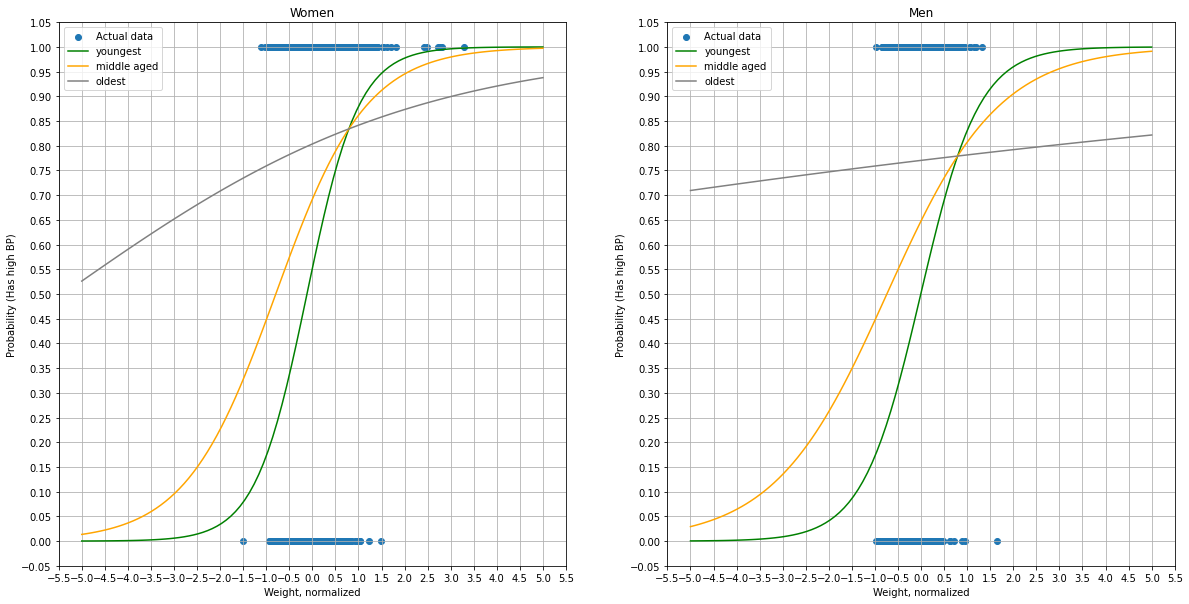

In [13]:
# exercise 11

def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))

# Split data to women/men.
fram_women = fram[fram["SEX"] == "female"]
fram_men = fram[fram["SEX"] == "male"]

p = fit.params

# Prepare regression parameters for each age group of women.
intercept_middleaged_women = p.Intercept
slope_middleaged_women  = p["sFRW"]
#
intercept_youngest_women = intercept_middleaged_women - p["sAGE"]
slope_youngest_women  = slope_middleaged_women - p["sFRW:sAGE"]
#
intercept_oldest_women = intercept_middleaged_women + p["sAGE"]
slope_oldest_women  = slope_middleaged_women + p["sFRW:sAGE"]

# Prepare regression parameters for each age group of men
intercept_middleaged_men = p.Intercept + p["SEX[T.male]"]
slope_middleaged_men  = p["sFRW"] + p["SEX[T.male]:sFRW"] + p["SEX[T.male]:sAGE"]
#
intercept_youngest_men = intercept_middleaged_men - p["sAGE"]
slope_youngest_men  = slope_middleaged_men - p["sFRW:sAGE"]
#
intercept_oldest_men = intercept_middleaged_men + p["sAGE"]
slope_oldest_men  = slope_middleaged_men + p["sFRW:sAGE"]

# Prepare plots for women and men.
fig, ax = plt.subplots(1,2, subplot_kw={"xlabel": "Weight, normalized", "ylabel": "Probability (Has high BP)"}, figsize=(20, 10))
#
ax_women = ax[0]
ax_men = ax[1]
#
ax_women.set_title("Women")
ax_men.set_title("Men")
#
ax_women.grid(True)
ax_men.grid(True)
#
ax_women.yaxis.set_major_locator(ticker.MultipleLocator(0.05))
ax_women.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
#
ax_men.yaxis.set_major_locator(ticker.MultipleLocator(0.05))
ax_men.xaxis.set_major_locator(ticker.MultipleLocator(0.5))

# Visualize actual (aka target) data on both plots.
ax_women.scatter(fram_women["sFRW"], fram_women["HIGH_BP"], label="Actual data")
ax_men.scatter(fram_men["sFRW"], fram_men["HIGH_BP"], label="Actual data")

# Visualize the predicted results for all age groups of women.
X = np.linspace(-5, 5, 100)
ax_women.plot(X, logistic(X * slope_youngest_women + intercept_youngest_women), color = "green", label="youngest")
ax_women.plot(X, logistic(X * slope_middleaged_women + intercept_middleaged_women), color = "orange", label="middle aged")
ax_women.plot(X, logistic(X * slope_oldest_women + intercept_oldest_women), color = "gray", label="oldest")
#
ax_men.plot(X, logistic(X * slope_youngest_men + intercept_youngest_men), color = "green", label="youngest")
ax_men.plot(X, logistic(X * slope_middleaged_men + intercept_middleaged_men), color = "orange", label="middle aged")
ax_men.plot(X, logistic(X * slope_oldest_men + intercept_oldest_men), color = "gray", label="oldest")
#
ax_women.legend()
ax_men.legend()


How do the models with different ages and genders differ from each other?

***
Outcomes:
- For both genders probability of having a high blood pressure increases with age.
- In the same age group women have a slightly bigger probability of having a high blood pressure than men.
- Old people (regardless of gender) most probably have a high blood pressure.

***

Create here a helper function `train_test_split` that gets a DataFrame as parameter and return a pair of DataFrames: one for training and the second for testing. 
The function should get parameters in the following way:
```python
train_test_split(df, train_fraction=0.8)
```
The data should be split randomly to training and testing DataFrames so that `train_fraction` fraction of data should go into the training set. Use the `sample` method of the DataFrame.

In [14]:
# exercise 12

def train_test_split(df:pd.DataFrame, train_fraction:float=0.8):
    df_train = df.sample(frac=train_fraction)
    df_test = df.drop(df_train.index)

    df_train.reset_index(inplace=True)
    df_test.reset_index(inplace=True)
    
    return df_train, df_test


Check the prediction accuracy of your model using cross validation. Use 100-fold cross validation and training_fraction 0.8.

In [28]:
# exercise 13

error_model=[]
np.random.seed(1)

for _ in range(100):
    train, test = train_test_split(fram)
    fit = smf.glm(formula="HIGH_BP ~ sFRW + SEX + SEX:sFRW + sAGE + sFRW:sAGE + SEX:sAGE", data=train, family=sm.families.Binomial()).fit()
    pred = fit.predict(test, transform=True)
    tp = (pred > 0.5) & (test["HIGH_BP"] == 1)
    tn = (pred < 0.5) & (test["HIGH_BP"] == 0)
    correct_pred = tp | tn
    incorrect_pred = ~correct_pred
    error_rate = np.mean(incorrect_pred)
    error_model.append(error_rate)  

err_rate = np.mean(error_model)
acc = 1 - err_rate
print(f"Accuracy = {acc}, Error rate = {err_rate}")

Accuracy = 0.6688172043010753, Error rate = 0.3311827956989247


## Predicting coronary heart disease

Let us use again the same data to learn a model for the occurrence of coronary heart disease. We will use logistic regression to predict whether a patient *sometimes* shows symptoms of coronary heart disease. For this, add to the data a binary variable `hasCHD`, that describes the event (`CHD > 0`). The binary variable `hadCHD` can get only two values: 0 or 1. As a sanity check, compute the mean of this variable, which tells the number of positive cases.

In [16]:
# exercise 14
# Put your solution here!

Next, form a logistic regression model for variable `hasCHD` by using variables sCHOL, sCIG, and sFRW, and their interactions as explanatory variables. Store the fitted model to variable `fit`. Compute the prediction accuracy of the model, store it to variable `error_rate`.

In [17]:
# exercise 15
# Put your solution here!

Visualize the model by using the most important explanator on the x axis. Visualize both the points (with `plt.scatter`)
and the logistic curve (with `plt.plot`).

In [18]:
# exercise 16
def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))
# Put your solution here!

Is the prediction accuracy of the model good or bad? Can we expect to have practical use of the model?
***
Your solution here.
***

If a person has cholestherol 200, smokes 17 cigarets per day, and has weight 100, then what is the probability that he/she sometimes shows signs of coronal hear disease? Note that the model expects normalized values. Store the normalized values to dictionary called `point`. Store the probability in variable `predicted`.

In [19]:
# exercise 17
# Put your solution here!